# Parth Lahane
## 1001912459

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Fetch titanic dataset from github

In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

Categorise data as required

In [ ]:
# ref : https://towardsdatascience.com/creating-conditional-columns-on-pandas-with-numpy-select-and-where-methods-8ee6e2dbd5d5

def Preprocess(option):
  values = []
  conditions = []
  preprocessed = []
  if option == 'Sex':
    values = ['male', 'female']

  elif option == 'Age':
    conditions = [
                  (titanic['Age'] <= 18),
        (titanic['Age'] > 18) & (titanic['Age'] <= 45),
        (titanic['Age'] > 45)
    ]
    values = ['young', 'middle', 'old']

  elif option == 'Fare':
    mean = np.mean(titanic['Fare'])
    conditions = [
                  (titanic['Fare'] < mean),
                  (titanic['Fare'] >= mean)
    ]
    values = ['poor', 'rich']

  elif option == 'Pclass':
     values = [1, 2, 3]

  if option != 'Sex' and option != 'Pclass':
    preprocessed = np.select(conditions, values)
  return preprocessed, values

get total of the category

In [ ]:
def totalRows(option):
  filtered = []
  columns = titanic[option].unique()
  for column in columns:
    filtered.append(len(titanic[titanic[option] == column]))
  return filtered

fetches rows of records that survived for a category

In [ ]:
def getSurvived(option):
  survived = []
  columns = titanic[option].unique()
  for column in columns:
    filtered  = titanic[titanic[option] == column]
    survived.append(len(filtered[filtered["Survived"] == 1]))
  return survived

displays percentages of survived vs total

In [ ]:
def displayResults(total, survivors, option, values):
  print("\n\n")
  print("Results " + option + ":")
  print("\n\n")
  for i in range(0, len(total)):
    print(str(values[i]) + " percentage = " + str(survivors[i]/total[i]))
  print("\n\n")

Graph results as histogram

In [ ]:
# ref: https://www.tutorialspoint.com/matplotlib/matplotlib_histogram.htm
def graphResults(total, survivors, option, values):
  difference = []
  zip_object = zip(total, survivors)
  for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)
  ind = np.arange(len(total))
  width = 0.35
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(ind, survivors, width, color='lime')
  ax.bar(ind, difference, width,bottom=survivors, color='maroon')
  ax.set_ylabel('Survivors')
  ax.set_title('Survival Analysis based on ' + str(option))
  ax.set_xticks(ind)
  ax.set_xticklabels(values)
  ax.legend(labels=['Survived', 'Did not Survive'])
  plt.show()

Main Block

In [ ]:
def titanicAnalysis(option):
  titanic.dropna(subset = [option], inplace=True)

  preprocessed, values = Preprocess(option)

  if option != 'Sex' and option != 'Pclass':
    titanic[option] = preprocessed

  total = totalRows(option)

  survivors = getSurvived(option)

  displayResults(total, survivors, option, values)

  graphResults(total, survivors, option, values)  




Results Sex:



male percentage = 0.18890814558058924
female percentage = 0.7420382165605095





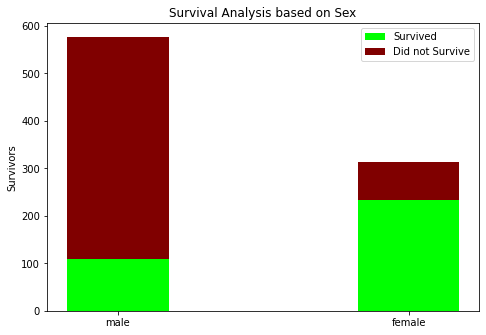

In [ ]:
option = "Sex"
# option = "Age"
# option = "Fare"
# option = "Pclass"

titanicAnalysis(option)